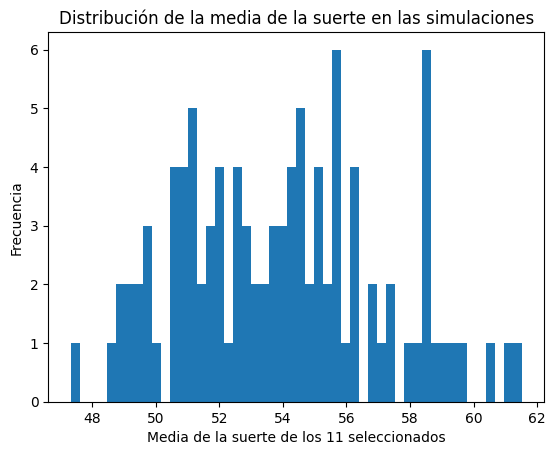

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
# 1. Generar nombres y apellidos
def generar_nombre():
  # Listas de nombres y apellidos comunes (Puedes personalizarlas)
  nombres = ["Juan", "María", "Pedro", "Ana", "Luis", "Laura", "Diego", "Sofía", "Carlos", "Andrea"]
  primeros_apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Sánchez", "Pérez", "Gómez", "Díaz"]
  segundos_apellidos = ["Pérez", "Díaz", "Gómez", "Álvarez", "Romero", "Hernández", "Moreno", "Martín", "Jiménez", "Ruiz"]
  nombres_completos = []
  for i in range(18300):
    nombre = random.choice(nombres)
    primer_apellido = random.choice(primeros_apellidos)
    segundo_apellido = random.choice(segundos_apellidos)
    nombre_completo = f"{nombre} {primer_apellido} {segundo_apellido}"
    nombres_completos.append(nombre_completo)
  return nombres_completos
  # 2. Generar esfuerzos y suerte
def generar_datos(num_participantes):
    esfuerzo = np.random.normal(loc=50, scale=10, size=num_participantes)
    suerte = np.random.normal(loc=50, scale=10, size=num_participantes)
    return esfuerzo, suerte
# 3. Calcular éxito
def calcular_exito(esfuerzo, suerte):
    # ... (implementación para calcular el éxito, puedes usar una combinación lineal o una función más compleja)
    exito = (0.9 * esfuerzo) + (0.1* suerte)
    return exito

# 4. Seleccionar los 11 mejores
def seleccionar_mejores(exito, num_seleccionados=11):
    indices_mejores = np.argsort(exito)[::-1][:num_seleccionados]
    return indices_mejores

# 5. Simulación y análisis
def simular(num_simulaciones, num_participantes):
    medias_suerte_seleccionados = []
    for _ in range(num_simulaciones):
        esfuerzo, suerte = generar_datos(num_participantes)
        exito = calcular_exito(esfuerzo, suerte)
        indices_mejores = seleccionar_mejores(exito)
        medias_suerte_seleccionados.append(np.mean(suerte[indices_mejores]))
    return medias_suerte_seleccionados

# Ejecutar la simulación
num_simulaciones = 100
num_participantes = 18300
resultados = simular(num_simulaciones, num_participantes)

# Histograma
plt.hist(resultados, bins=50)
plt.xlabel('Media de la suerte de los 11 seleccionados')
plt.ylabel('Frecuencia')
plt.title('Distribución de la media de la suerte en las simulaciones')
plt.show()